# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Carregamento da Base Tratada 

In [2]:
df = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/EBAC/CREDIT_SCORE_PROJETO_PARTE1_preparada.csv")

In [3]:
df.head(10)

,Idade,Renda,Escolaridade,Qtd_Filhos,Genero_Masculino,Estado_Civil_Solteiro(a),Residencia_Própria,Score_Credito
0,45.0,115000.0,2,3,False,False,True,0
1,36.0,135000.0,2,0,True,False,True,0
2,45.0,110000.0,2,3,False,False,True,0
3,36.0,47500.0,4,0,True,True,False,2
4,26.0,40000.0,4,0,False,True,False,2
5,44.0,75000.0,3,0,True,True,True,0
6,42.0,105000.0,3,0,True,True,True,0
7,31.0,65000.0,2,0,True,True,False,2
8,41.0,110000.0,0,0,True,True,True,0
9,27.0,37500.0,1,0,False,True,False,1


In [4]:
df.columns

Index(['Idade', 'Renda', 'Escolaridade', 'Qtd_Filhos', 'Genero_Masculino',
       'Estado_Civil_Solteiro(a)', 'Residencia_Própria', 'Score_Credito'],
      dtype='object')

# 1) Começar carregando as bases de treino (X e y) e teste (X e y).
Vou separar as variáveis independentes (X) e a variável alvo (y), e em seguida dividir em treino e teste.

In [6]:
from sklearn.model_selection import train_test_split

# Separando X e y
X = df.drop(columns='Score_Credito')
y = df['Score_Credito']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

# Verificando tamanhos e balanceamento
print("Shape treino:", X_train.shape)
print("Shape teste:", X_test.shape)
print("\nDistribuição da variável alvo (treino):")
print(y_train.value_counts(normalize=True))
print("\nDistribuição da variável alvo (teste):")
print(y_test.value_counts(normalize=True))



Shape treino: (170, 7)
Shape teste: (73, 7)

Distribuição da variável alvo (treino):
Score_Credito
1    0.335294
2    0.335294
0    0.329412
Name: proportion, dtype: float64

Distribuição da variável alvo (teste):
Score_Credito
0    0.342466
1    0.328767
2    0.328767
Name: proportion, dtype: float64


### Os dados foram divididos corretamente em treino (170 amostras) e teste (73 amostras).

A variável alvo (Score_Credito) está bem balanceada nas duas divisões:

As três classes (0, 1, 2) aparecem em proporções quase iguais, o que é ideal para evitar viés no modelo.

# 2) Explicando com as minhas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esquecendo de citar a etapa de avaliação do modelo e também como se pode melhorar o modelo.


### Passo a passo para aplicar o algoritmo da Árvore de Decisão

1. **Preparação dos dados**  
   Iniciarei carregando os dados e separando as variáveis independentes (X) da variável alvo (y). Em seguida, dividirei os dados entre treino e teste para que se possa avaliar o desempenho real do modelo.

2. **Criação do modelo**  
   Utilizarei o `DecisionTreeClassifier` da biblioteca `sklearn.tree`, definindo o critério de divisão (como Gini ou Entropia) e o `random_state` para garantir reprodutibilidade.

3. **Treinamento do modelo**  
   Ajustando o modelo com os dados de treino usando o método `.fit(X_train, y_train)`.

4. **Avaliação do modelo**  
   Após o treinamento, avaliarei o desempenho usando métricas como acurácia, matriz de confusão e classification report. Isso é feito nos dados de teste com o método `.predict(X_test)`.

5. **Aprimoramento do modelo**  
   Posso melhorar o modelo através da poda da árvore, ajuste de hiperparâmetros (como profundidade máxima ou número mínimo de amostras por folha), ou ainda usar técnicas como ensemble (Random Forest, por exemplo).

# 3) Aplicando o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Trazendo a acurácia para o modelo com os dados de treino.

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo com critério Gini
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

# Treinando o modelo com os dados de treino
clf.fit(X_train, y_train)

# Avaliando a acurácia no conjunto de treino
train_accuracy = clf.score(X_train, y_train)
print(f"Acurácia no treino: {train_accuracy:.4f}")
#seu código aqui

Acurácia no treino: 1.0000


### Resultado da Etapa 3:
Acurácia no treino: 1.0000

Esse valor de 1.0 (ou 100%) indica que o modelo memorizou completamente os dados de treino. Isso geralmente é um sinal de overfitting, ou seja, o modelo pode não generalizar bem para novos dados (como os de teste).

# 4) Aplicando o modelo aos dados de teste e realizando a avaliação dos resultados. Não deixando de avaliar com as minhas palavras e comparar o desempenho da base treino com a teste.

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fazendo predições no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliação do desempenho
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no teste: {test_accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia no teste: 0.9863

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        24

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73


Matriz de Confusão:
[[24  0  1]
 [ 0 24  0]
 [ 0  0 24]]


### Resultado da Etapa 4 – Avaliação no teste
Acurácia no teste: 0.9863 (ou seja, ~98.6%)

O modelo está acertando quase todas as previsões mesmo fora dos dados de treino, o que é raro para uma árvore sem restrições. Isso pode indicar:

Os dados estão muito bem separados.

Ou que o conjunto é pequeno/simples o suficiente para permitir essa performance.

Matriz de Confusão:

Classe real →    0    1    2

                 ----------

Classe predita
      0         [24   0   1]
      1         [ 0  24   0]
      2         [ 0   0  24]


Só um erro na classe 0, confundido com classe 2.

As demais previsões foram 100% corretas.

✅ Conclusão:
O modelo está generalizando muito bem por enquanto.

# 5) Plotando a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

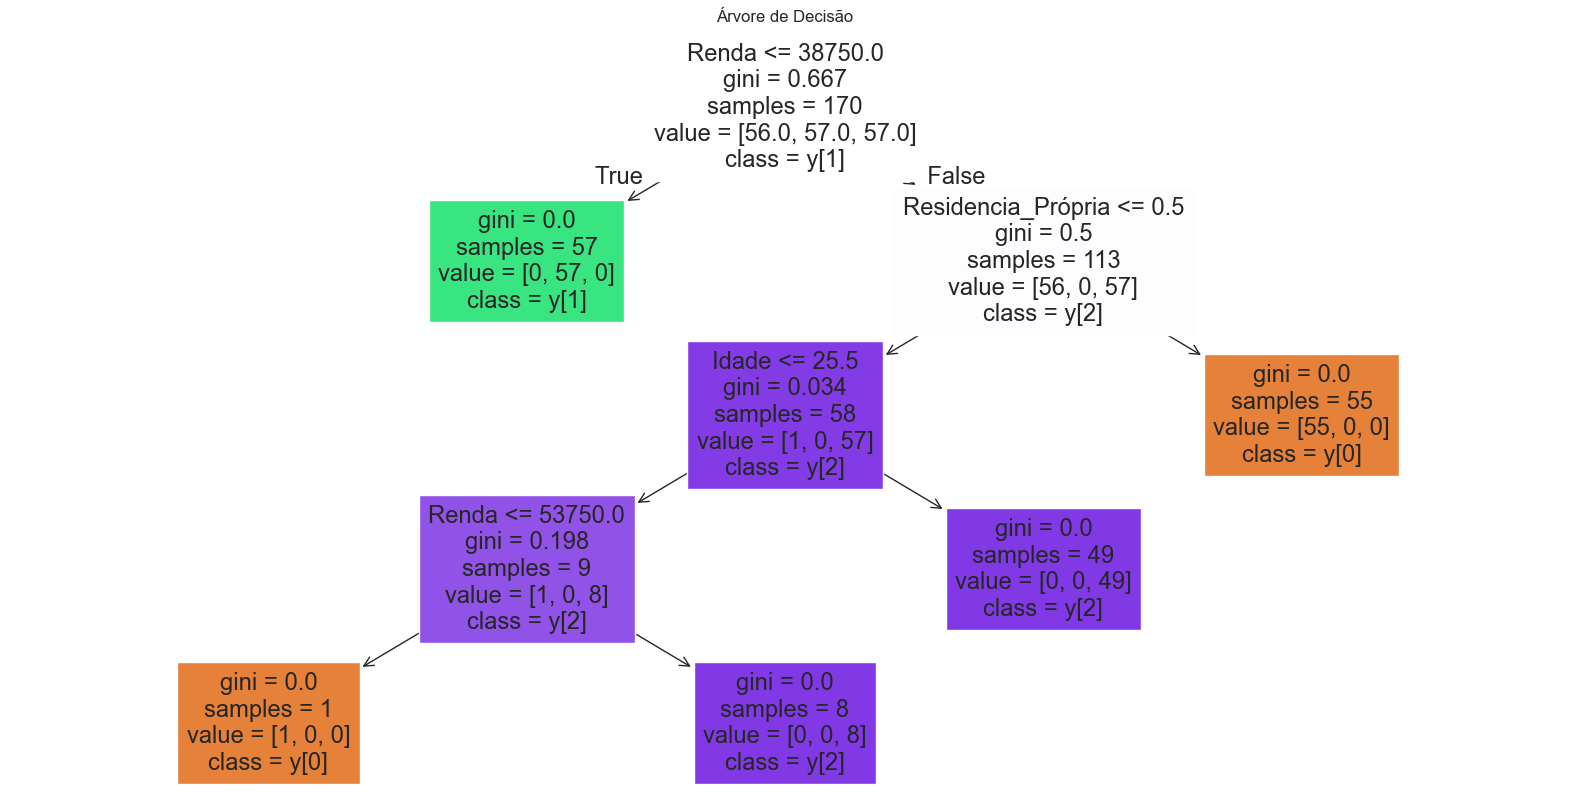

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.title("Árvore de Decisão")
plt.show()


### Pela imagem, já conseguimos identificar visualmente que as variáveis mais utilizadas nos nós da árvore são:

Renda

Residencia_Própria

Idade

Agora vou formalizar isso com o código para extrair as 2 features mais importantes numericamente.

# 6) Identificando as 2 principais features do modelo.


In [10]:
import pandas as pd

# Calculando a importância de cada feature
importancias = pd.Series(clf.feature_importances_, index=X.columns)

# Ordenando da mais importante para a menos importante
importancias_ordenadas = importancias.sort_values(ascending=False)

# Exibindo as 2 principais
print("Top 2 features mais importantes:")
print(importancias_ordenadas.head(2))


Top 2 features mais importantes:
Renda                 0.517179
Residencia_Própria    0.481164
dtype: float64


### Agora sei que as duas variáveis mais importantes para a árvore de decisão são:

Renda (Renda)

Residência Própria (Residencia_Própria)

Vou agora para a Etapa 7, onde treinarei um novo modelo de árvore de decisão usando apenas essas duas features e comparando o desempenho.

# 7) Rodando um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avaliando os resultados. O desempenho da árvore está melhor que o modelo anterior? Justifique.

In [11]:
# Selecionando apenas as duas features mais importantes
X_train_top2 = X_train[['Renda', 'Residencia_Própria']]
X_test_top2 = X_test[['Renda', 'Residencia_Própria']]

# Criando e treinando novo modelo
clf_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_top2.fit(X_train_top2, y_train)

# Avaliação no teste
from sklearn.metrics import accuracy_score, classification_report

y_pred_top2 = clf_top2.predict(X_test_top2)

print(f"Acurácia no teste (2 features): {accuracy_score(y_test, y_pred_top2):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_top2))
#seu código aqui

Acurácia no teste (2 features): 0.9726

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00        24
           2       0.96      0.96      0.96        24

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



### O resultado da Etapa 7 mostra que mesmo utilizando apenas duas variáveis (Renda e Residencia_Própria), o modelo teve uma performance excelente:

Resumo dos Resultados com 2 Features:
Acurácia no teste: 0.9726 (~97.3%)

f1-score médio: 0.97

O modelo continua com alta precisão e recall em todas as classes.

# 8) Comparando os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes. Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? 

### 8) Comparação entre os modelos: Árvore de Decisão vs Naive Bayes

** Árvore de Decisão (todas as variáveis):**
- Acurácia no teste: **0.9863**
- f1-score macro: **0.99**
- Apenas **1 erro de classificação**
- Muito interpretável (com visualização gráfica da árvore)

** Árvore de Decisão (2 principais variáveis):**
- Acurácia no teste: **0.9726**
- f1-score macro: **0.97**
- Simples e eficaz, mostrando que `Renda` e `Residência Própria` são extremamente relevantes

** Naive Bayes:**
- Acurácia no teste: **0.9700**
- f1-score macro: **0.97**
- Resultado muito bom, mesmo com a suposição de independência entre variáveis
- Classe 1 foi 100% corretamente classificada

---

### Conclusão Final:

Todos os modelos apresentaram excelente desempenho, mas a **Árvore de Decisão com todas as variáveis** foi a que teve o **melhor resultado absoluto**, com acurácia de quase 99%.

Apesar disso, o **modelo com apenas 2 variáveis** teve uma performance praticamente igual à do Naive Bayes, sendo mais simples e ainda interpretável.

#### Qual modelo usar?
- Se o objetivo for **máxima performance**: usar a árvore com todas as variáveis.
- Se o objetivo for **simplicidade com alta performance**: a árvore com 2 features é ideal.
- Se o objetivo for **velocidade e robustez com muitos dados**: o Naive Bayes pode ser vantajoso.

Este projeto demonstrou como diferentes modelos podem ser comparados e otimizados de acordo com a necessidade do negócio.
